In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib inline

https://www.kaggle.com/katotaka/kaggle-prediction-house-prices

概要
モデルの作成

モデル作成の為の準備(ライブラリのインポート、データの読込・確認)
線形回帰によるモデルの作成
モデルの評価
モデルの改善

データの分析
データの整備
アルゴリズムの変更
※本来ならば最初のモデル作成の前にデータの分析や整備を行うべきだが、学習内容をシンプルにする為に、あえて上記の手順で実施

実行環境について
このPython 3環境には、多くの有用な分析ライブラリがインストールされていて、Docker Imageで定義されています。Docker Image 参照先リンク

ライブラリについて
機械学習の実装を行うに当たって、役に立つライブラリについて説明。

Pandas
データ解析を支援する機能を提供するライブラリ。数表や時系列データを操作するためのデータ構造と演算を提供。

特徴
・データ操作のための高速で効率的なDataFrame (行列型) オブジェクト
・メモリ内のデータ構造と複数のフォーマット(CSV, TXT, xls, xlsx, )のデータ間で相互に読み書きするためのツール群
・データ処理(カウント, 集計, 変換, 欠損値処理, マージ, 結合, etc...)
・時系列データ処理(日, 週, 月, 四半期, 年)
Matplotlib(mpl_toolkits含む)
グラフ描画の為のライブラリ。

グラフの種類

・折れ線グラフ
・散布図
・ヒストグラム
・ヒートマップ
・3Dグラフ

Seaborn
Matplotlibの機能をより美しく、またより簡単に実現するためのライブラリ。

グラフの種類
・折れ線グラフ
・散布図
・ヒストグラム
・ヒートマップ
・Numpy
プログラミング言語Pythonにおいて数値計算を効率的に行うためのライブラリ。

効率的な数値計算を行うための型付きの多次元配列（例えばベクトルや行列など）のサポートをPythonに加えるとともに、それらを操作するための大規模な高水準の数学関数ライブラリを提供。

scikit-learn
Pythonのオープンソース機械学習ライブラリ。 Pythonの数値計算ライブラリのNumPyとSciPyとやり取りするよう設計されている。

1. モデルの作成

Kaggle上に保存されているデータの確認

画面右上の < ボタンをクリック後、Dataタブをクリックすると、本環境に保存されているデータの一覧が表示される。

Kaggle上に保存されているデータの読み込み¶

ファイルパスは ../input/[読み込みたいデータファイル]

Pandasでデータを読み込むとDataFrameというオブジェクトができる。

DataFrameとは簡単に言うと行列データで、機械学習を行う際に扱いやすいデータ形式。

In [6]:
df = pd.read_csv("train.csv")

In [7]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



線形回帰分析での予測¶

・カラム[OverallQual]と線形回帰分析を用いて学習処理を実施する

・カラム[OverallQual] : Rates the overall material and finish of the house（家全体の材料と仕上げの評価）

・線形回帰分析の数式 : y = θ0 + θ1X1 + θ2X2 + θ3X3 + .... + θX

・本処理の数式 : y[SalesPrice] = θ0[y切片] + θ1[傾き] * X1[OverallQual]


In [10]:
#XにOverallQual,yにSalePriceをセット
X=df[["OverallQual"]].values
y=df["SalePrice"].values

#アルゴリズムに線形代数(Linear Regression)を採用
slr=LinearRegression()

#fit関数でモデル作成
slr.fit(X,y)

#偏回帰係数（回帰分析において得られる回帰方程式の各説明変数の係数）を出力
#偏回帰係数はscikit-learnのcoefで取得
print("傾き:{0}".format(slr.coef_[0]))

#y切片(直線とy軸との交点)を出力
#余談:x切片もあり、それは直線とx軸との交点を指す
print("y切片:{0}".format(slr.intercept_))

傾き:45435.8025930994
y切片:-96206.07951476038


線形回帰から導き出される数式

y[SalesPrice] = -96206.07951476038[y切片] + 45435.8025930994[傾き] * X[OverallQual]

線形回帰から導き出される数式とデータセットを図示

・plt.scatter(X, y) : 散布図

・plt.plot(X,slr.predict(X),color='red') : 折れ線グラフ

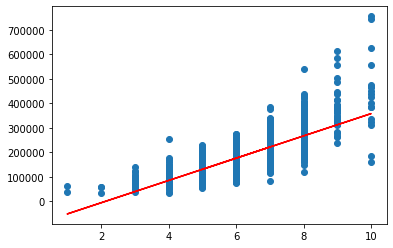

In [11]:
#散布図
plt.scatter(X,y)

#折れ線グラフ
plt.plot(X,slr.predict(X),color="red")

plt.show()

テストデータを用いて予測
ここまでの処理でモデルが作成されましたので、テスト(モデル評価用)データを用いて予測を行います

In [12]:
df_test=pd.read_csv("test.csv")


In [13]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [15]:
#テストデータのOverallQualの値をセット
X_test=df_test[["OverallQual"]].values

#学習済みのモデルから予測した結果をセット
y_test_pred=slr.predict(X_test)

In [16]:
y_test_pred

array([130972.93345074, 176408.73604384, 130972.93345074, ...,
       130972.93345074, 130972.93345074, 221844.53863694])

Kaggleにサブミットするファイル形式に変換¶
作成したモデルをKaggleに提出して評価を受ける為に、決められた提出フォーマットに変換します。

Id、SalePriceの2列のファイル

In [17]:
#df_testにSalePriceカラムを追加し、学習済みのモデルから予測した結果をセット
df_test["SalePrice"]=y_test_pred

In [18]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,130972.933451
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,176408.736044
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,130972.933451
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,176408.736044
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,267280.341230


In [19]:
#ID,SalePriceの２列だけ表示
df_test[["Id","SalePrice"]].head()

,Id,SalePrice
0,1461,130972.933451
1,1462,176408.736044
2,1463,130972.933451
3,1464,176408.736044
4,1465,267280.341230


In [20]:
#csvファイルに変換


2. モデルの改善
最初に作成したモデルは、工夫もなくデータを読み込み、scikit-learnで学習させたもの。

ここからは、予測したいデータと関連の深いデータは何か？といった調査や、「データの前処理」と呼ばれるデータの加工を行い、モデルの精度をあげる為の作業を実施。

その為にはデータを理解することが必要。各変数を見て、その意味を理解し、この問題との関連性を調査。時間がかかるが大事な作業。

カラムの把握
カラムの一覧を表示し、それぞれの内容を把握。そこからSalePriceに影響を与えるデータは何か？という事を、仮説をたてて考える。

今回使用しているデータの詳しい説明は../input/data_description.txtにある。

In [21]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

SalesPriceを知る

基本統計量の表示

項目名	意味

count	データ件数

mean	平均

std	標準偏差

min	最小値

25%	第1四分位数

50%	第2四分位数

75%	第3四分位数

max	最大値

四分位数:データを大きさの順に並べたときに下から25％に位置する値・50%に位置する値・75%に位置する値のことをいう。

標準偏差:データのばらつきの大きさを表わす指標

In [22]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

SalesPriceをヒストグラムで分析¶

横軸にSalesPrice

縦軸に割合


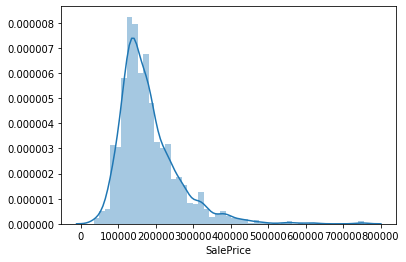

In [23]:
#ヒストグラム
sns.distplot(df.SalePrice)

160,000$位のデータの割合が最も多い

極端に高い金額のものが存在する

正規分布(グラフにしたときに数値の大半が中央に集中し、左右対称の釣り鐘型に「分布」するデータ)ではない

機械学習における正規分布の効果とは

予測しようとしている値が正規分布に従った方が精度がよくなる

SalePriceと相関係数の高い上位10個のデータを調査

相関係数とは

相関関係を指し示す係数のこと

相関関係とは

片方の変数が変化すれば、もう一方の変数も変化するという、2つの変数間の関係性をあらわしているもの

2種類のデータの（直線的な）関係性の強さを −1 から ＋1 の間の値で表しており、 正(+)の相関の場合は、片方の変数が大きくなればもう

片方の変数も大きくなり、 負(-)の相関の場合は、片方の変数が大きくなればもう片方の変数も小さくなる

なお、相関関係の強弱については下記の通り

相関係数	相関の強さ

±0.2 ～ ±0.4	弱い相関がある

±0.4 ～ ±0.7	相関がある

±0.7 ～ ±0.9	強い相関がある

±0.9 ～ ±1.0	(ほぼ)完全な相関がある

注意点

相関関係は因果関係と同じものではない。疑似相関の場合がある

因果関係 : 2つの変数の間に原因と結果の関係があること

疑似相関 : 相関係数は高いが、2つの変数の間に因果関係がないこと

疑似相関についてはWikiの例が分かりやすい

In [24]:
#相関係数を算出
corrmat=df.corr()
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


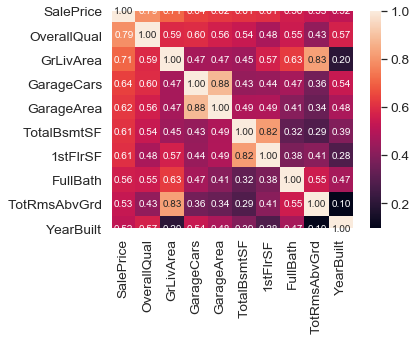

In [28]:
#算出した相関係数を相関が高い順に上位１０個のデータを表示

#ヒートマップに表示させるカラムの数
k=10

#SalesPriceとの相関が大きい上位１０個のカラム名を取得
cols=corrmat.nlargest(k,"SalePrice")["SalePrice"].index

#SalesPriceとの相関が大きい上位１０個のカラム名を取得
#.T(Trancepose[転置行列])を行う理由は、corrcoefで相関を算出する際に、各カラムの値を行毎にまとめなければならないため
cm=np.corrcoef(df[cols].values.T)

#ヒートマップのフォントサイズを指定
sns.set(font_scale=1.25)

#算出した相関データをヒートマップで表示
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt=".2f",annot_kws={"size":10},
               yticklabels=cols.values,xticklabels=cols.values)
plt.show()

#corrmat.nlargest(k,"SalePrice"):SalePriceの値が大きい順にkの行数だけ抽出した行と前列の行列データ
#corrmat.nlargest(k,"SalePrice")["SalePrice"]:SalePriceの値が大きい順にkの行数だけ抽出した行とSalePrice列だけ抽出したデータ
#corrmat.nlargest(k,"SalePrice")["SalePrice"].index:行の項目を抽出。データの中身はIndex(["SalePrice","OverallQual",...,])
#cols.values:カラムの値(SalesPrice,OverallQual)

ヒートマップからSalePriceと相関が高いのは、OverallQual と GrLivArea だと分かる。

相関の強い OverallQual と GrLivArea の散布図の表示

C:\Users\yoshi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


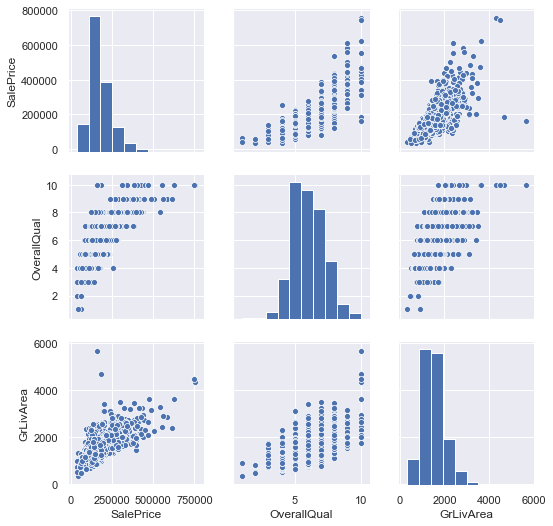

In [31]:
sns.set()
cols=["SalePrice","OverallQual","GrLivArea"]
sns.pairplot(df[cols],size=2.5)
plt.show()

一番右上のSalesPriceとGrLivAreaの散布図を見てみると、傾向から大幅に外れているデータが２つ存在。

このデータを不適切な学習データ、もしくは異常値データとみなして削除

In [32]:
#数値の大きい上位２位のデータを表示
df.sort_values(by="GrLivArea",ascending=False)[:2]
#ascending=False は"GrLivArea"の高いデータから順に並び変えられる

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [33]:
#判明したデータのIdの値を指定して削除
df=df.drop(index=df[df["Id"]==1299].index)
df=df.drop(index=df[df["Id"]==524].index)

削除されているかを確認。

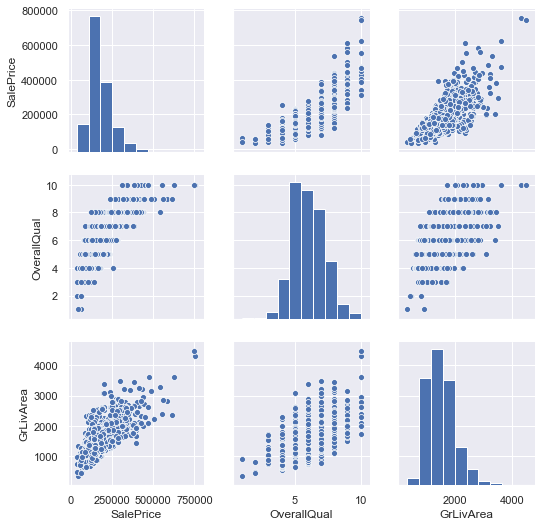

In [34]:
sns.set()
cols=["SalePrice","OverallQual","GrLivArea"]
sns.pairplot(df[cols],size=2.5)
plt.show()

GrLivAreaを使用してモデルを学習

In [36]:
#XにGrLivArea,yにSalePriceをセット
X=df[["GrLivArea"]].values
y=df["SalePrice"].values

#アルゴリズムに線形代数(Linear,Regression)を採用
slr=LinearRegression()

#fit関数で学習開始
slr.fit(X,y)

#偏回帰係数（回帰分析において得られる回帰方程式の各説明変数の係数）を出力
#偏回帰係数はscikit-learnのcoefで取得
print("傾き;{0}".format(slr.coef_[0]))

#y切片（直線とy軸との交点）を出力
#余談:x切片もあり、それは直線とx軸との交点を指す
print("y切片:{0}".format(slr.intercept_))

傾き;115.03998299377375
y切片:7168.969884852384


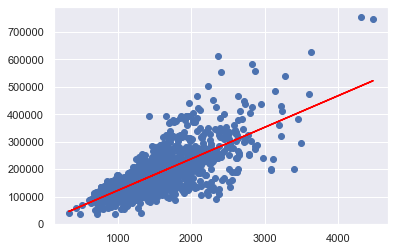

In [38]:
#散布図
plt.scatter(X,y)

#折れ線グラフ
plt.plot(X,slr.predict(X),color="red")
plt.show()

In [39]:
df_test=pd.read_csv("test.csv")

In [40]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [41]:
X_test=df_test[["GrLivArea"]].values

y_test_pred=slr.predict(X_test)

In [42]:
y_test_pred

array([110244.79464727, 160057.10728358, 194569.10218171, ...,
       147977.90906923, 118757.75338881, 237248.9358724 ])

In [43]:
#df_testにSalePriceカラムを追加し、学習済みのモデルから予測した結果をセット
df_test["SalePrice"]=y_test_pred

In [44]:
#Id,SalePriceの２列だけ表示
df_test[["Id","SalePrice"]].head()

,Id,SalePrice
0,1461,110244.794647
1,1462,160057.107284
2,1463,194569.102182
3,1464,191693.102607
4,1465,154420.148117


重回帰分析の採用¶
SalePriceと相関の高いOverallQualとGrLivAreaを説明変数に使用

In [45]:
#XにGrLivArea,yにSalePriceをセット
X=df[["OverallQual","GrLivArea"]].values
y=df["SalePrice"].values

#アルゴリズムに線形回帰を採用
slr=LinearRegression()

#fit関数で学習開始
slr.fit(X,y)

print("傾き:{0}".format(slr.coef_))
a1,a2=slr.coef_

print("y切片:{0}".format(slr.intercept_))
b=slr.intercept_

傾き:[32089.3252551    63.7826933]
y切片:-110959.85545809515


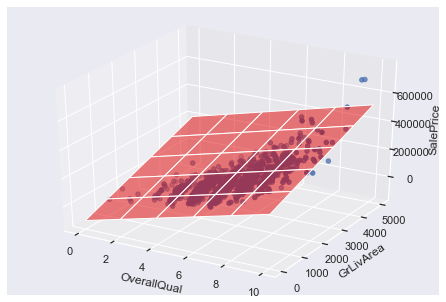

In [48]:
#3D（散布図）
x,y,z=np.array(df["OverallQual"]),np.array(df["GrLivArea"]),np.array(df["SalePrice"].values)
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter3D(np.ravel(x),np.ravel(y),np.ravel(z))

#3D（回帰平面）
#np.arange(0,10,2)1は#初項０、交差２で終点が１０の等差数列(array([2,4,6,8,10]))
X,Y=np.meshgrid(np.arange(0,12,2),np.arange(0,6000,1000))
Z=a1*X+a2*Y+b
ax.plot_surface(X,Y,Z,alpha=0.5,color="red")#alphaで透明度を指定
ax.set_xlabel("OverallQual")
ax.set_ylabel("GrLivArea")
ax.set_zlabel("SalePrice")

plt.show()

In [49]:
#テストデータの読み込み
df_test=pd.read_csv("test.csv")

In [50]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [52]:

# テストデータの OverallQual と GrLivArea の値をセット
X_test = df_test[["OverallQual", "GrLivArea"]].values

# 学習済みのモデルから予測した結果をセット
y_test_pred = slr.predict(X_test)

In [53]:
y_test_pred

array([106636.06401508, 166343.29546951, 153388.77820472, ...,
       127556.78741781, 111355.98331936, 241230.80792958])

In [54]:
df_test["SalePrice"]=y_test_pred

In [55]:
df_test[["Id","SalePrice"]].head()

,Id,SalePrice
0,1461,106636.064015
1,1462,166343.295470
2,1463,153388.778205
3,1464,183883.536127
4,1465,227396.594008
